## TCDD single dose (30 μg/kg) dataset

Stumbling upon the issues of the `scButterfly-perturbation.ipynb` with the sci-plex datasets given the few samples of perturbations for specific drug dosages, we will attempt to try the dataset used by scVIDR to be compared with scPreGan, and scGen.

We will evalute both scPreGan and scButterfly.

In [3]:
import scanpy as sc

# dataset downloaded from scVIDR github provided drive link
data = "../data/scvidr/nault2021_singleDose.h5ad"
adata = sc.read_h5ad(data)

In [4]:
adata

AnnData object with n_obs × n_vars = 30927 × 22213
    obs: 'Dose', 'batch', 'celltype'

In [8]:
adata.obs.groupby(['celltype', 'Dose']).size()

/tmp/ipykernel_3919116/721932447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(['celltype', 'Dose']).size()


celltype               Dose
B Cells                0        208
                       30      1565
Cholangiocytes         0        109
                       30       600
Endothelial Cells      0       1495
                       30      2852
Hepatocytes - central  0       2492
                       30      1325
Hepatocytes - portal   0       7512
                       30      1074
Macrophage             0       1508
                       30      6072
Neutrophils            0         61
                       30       614
Portal Fibroblasts     0         90
                       30        76
Stellate Cells         0        849
                       30       391
Subtype 1              0         67
                       30       280
T Cells                0        242
                       30      1445
dtype: int64

## Preprocessing

In [13]:
sc.pp.filter_cells(adata, min_counts=500)
sc.pp.filter_cells(adata, min_genes=720)
sc.pp.filter_genes(adata, min_cells=100)

# should this be per cell like https://github.com/facebookresearch/CPA/blob/main/preprocessing/sciplex3.ipynb? No, it is deprecated
sc.pp.normalize_total(adata) 

sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
adata = adata[:,adata.var.highly_variable]

In [14]:
control = adata[adata.obs["Dose"] == 0]
control

View of AnnData object with n_obs × n_vars = 14245 × 5000
    obs: 'Dose', 'batch', 'celltype', 'n_counts', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [15]:
perturb = adata[adata.obs["Dose"] == 30]
perturb

View of AnnData object with n_obs × n_vars = 14915 × 5000
    obs: 'Dose', 'batch', 'celltype', 'n_counts', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

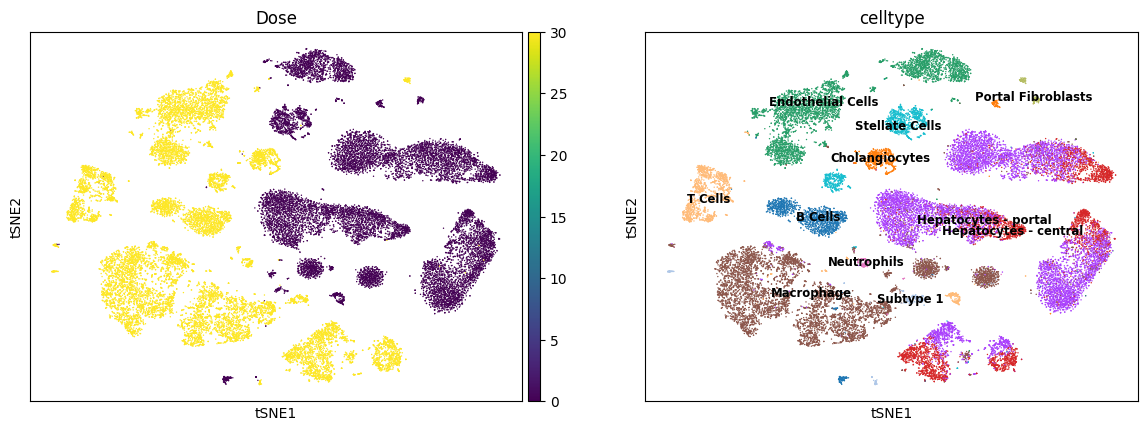

In [17]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.pl.tsne(adata, color=['Dose', 'celltype'], legend_loc='on data', legend_fontsize='small')

## scButterfly

## scPreGan